# Dimensionality reduction

In this task you will practice dimensionality reduction.
Use code cells to answer the Tasks and Markdown cells for the Questions (Q's).

In [1]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression

from matplotlib import pyplot as plt

# Load data

In [2]:
(X, y) = load_wine(return_X_y=True)

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0,stratify=y)

Lets take a quick look at the data:

In [13]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,13.52,3.17,2.72,23.5,97.0,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520.0
1,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0
2,13.76,1.53,2.70,19.5,132.0,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235.0
3,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0
4,12.77,3.43,1.98,16.0,80.0,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,14.10,2.02,2.40,18.8,103.0,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060.0
102,11.65,1.67,2.62,26.0,88.0,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562.0
103,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0
104,13.84,4.12,2.38,19.5,89.0,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480.0


# PCA + SVM

Task 1: Use X_train, y_train to train a SVM (SKlean's SVC) with the deafult parameters. You can read more about the algorithm in SKlearn's documentation.
Make sure you normailize the data by using StandardScaler
Evaulate the algorithm using accuracy score and X_test, y_test.

In [4]:
from sklearn.svm  import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


svc_m = SVC()
svc_m.fit(X_train_scaled, y_train)

y_pred = svc_m.predict(X_test_scaled)

acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

0.9861111111111112


Task 2: Now do the same, but use PCA.

In this task, we want to keep all of the variance! No data is going to be discarded.
You are asked to use the maximal number of componenets for PCA.

Q1: Your co-worker says that the results should be at least as good as the results we had without PCA. Explain why might he say that.

Print the accuracy of SVM + PCA.

In [5]:
pca = PCA(n_components=X_train.shape[1])
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svc_m = SVC()
svc_m.fit(X_train_pca, y_train)

y_pred = svc_m.predict(X_test_pca)

acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

0.9861111111111112


Q2: Did the results improve\stayed the same\got worse? 

The accuracy score is the same.


# PCA + logistice regression

Task 3: repeat task 1 with logistic regression.

Task 4: repeast task 2 with logistic regression.

In [6]:
from sklearn.linear_model import LogisticRegression


lgr_m = LogisticRegression()
lgr_m.fit(X_train_scaled, y_train)

y_pred = lgr_m.predict(X_test_scaled)

acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

0.9861111111111112


In [7]:


lgr_m = LogisticRegression()
lgr_m.fit(X_train_pca, y_train)

y_pred = lgr_m.predict(X_test_pca)

acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

0.9861111111111112


Q3: Did the results improved\stayed the same\got worse?

Strangly the result is the exact same.

Q4: How can you explain the difference between answers to Q2 and Q3. Hint: think about the nature of Logistic regression and the main difference of SVM from it. Hint: SVM assumes the data can be seperated by an hyperplan.

# Visualizing

Task 5: Use locally linear embedding in sklearn to visualize the data. Plot the results.
Optimze the n_neighbors by running at least 5 times and use the best looking result you can find.

Text(0.5, 1.0, '95')

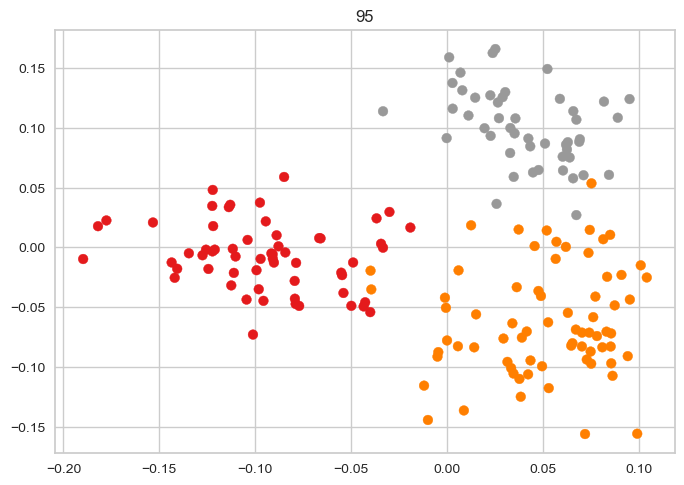

In [56]:
from sklearn.manifold import locally_linear_embedding
import matplotlib.pyplot as plt
import seaborn as sns

X_scaled = StandardScaler().fit_transform(X)


n = 95
X_lle = locally_linear_embedding(X_scaled, n_neighbors=n, n_components=2)[0]
plt.scatter(x=X_lle[:,0], y=X_lle[:,1], c=y, cmap='Set1')
plt.title(n)

Task 6: Use t-SNE to visualize the data. Plot the results.

Task 7: Use UMAP to visualize the data. Plot the results.

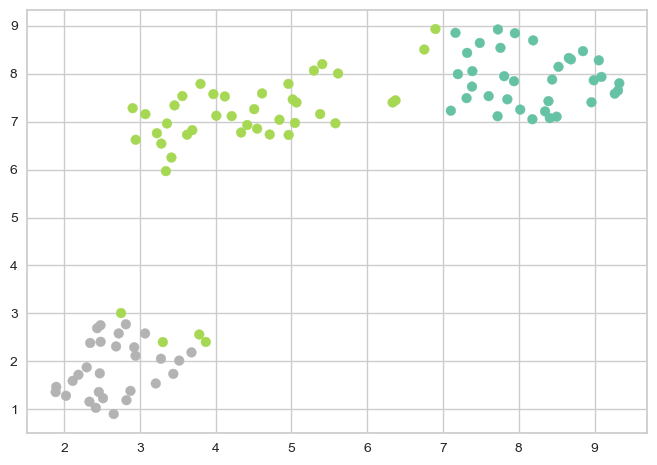

In [51]:
import umap
X_umap = umap.UMAP().fit_transform(X_train_scaled)
# sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=y_train, palette='tab10')
plt.scatter(X_umap[:,0], X_umap[:,1], c=y_train, cmap='Set2')

Q5: If we run one of this visualziaing algorithms various times with the default parameters, are we guranteed to see the same results? Why?
    
LLE would yield the same results, it doesn't use gradient decent where as UMAP and t-SNE do.

